# K-Means Clustering

## Step 1: Import Necessary Libraries 

In [32]:
# import libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from os.path import join

In [33]:
# set style for better visualizations

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## Step 2: Load Data

In [50]:
# create path

path = r'../Data_Extract_From_World_Development_Indicators'

In [52]:
# load data

df_clean = pd.read_csv('../Data/Clean_Data.csv')

In [54]:
# Display basic information about the dataset

print("Dataset shape:", df_clean.shape)
print("\nFirst few rows:")
df_clean.head()

Dataset shape: (4737, 9)

First few rows:


,Country Name,Country Code,Year,GDP per capita (current US$),Individuals using the Internet (% of population),"Life expectancy at birth, total (years)",GDP_growth,LE_change,Internet_growth
0,Afghanistan,AFG,2000,174.930991,NaN,55.005,NaN,NaN,NaN
1,Afghanistan,AFG,2001,138.706822,0.00472,55.511,-20.707691,0.506,NaN
2,Afghanistan,AFG,2002,178.954088,0.00456,56.225,29.016069,0.714,-3.389831
3,Afghanistan,AFG,2003,198.871116,0.08790,57.171,11.129686,0.946,1827.631579
4,Afghanistan,AFG,2004,221.763654,0.10600,57.810,11.511243,0.639,20.591581


## Step 3: Cleaning and Preprocessing

In [57]:
# Check for missing values and data types

print("Data types:")
print(df_clean.dtypes)
print("\nMissing values:")
print(df_clean.isnull().sum())

Data types:
Country Name                                         object
Country Code                                         object
Year                                                  int64
GDP per capita (current US$)                        float64
Individuals using the Internet (% of population)    float64
Life expectancy at birth, total (years)             float64
GDP_growth                                          float64
LE_change                                           float64
Internet_growth                                     float64
dtype: object

Missing values:
The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
Country Name                                           0
Country Code                                           0
Year                                                   0
GDP per capita (current US$)                         137
Individuals using the Internet (% o

In [59]:
# Remove rows with missing values in key numerical columns

df_clean = df_clean.dropna(subset=['GDP per capita (current US$)', 
                            'Individuals using the Internet (% of population)', 
                            'Life expectancy at birth, total (years)'])

In [60]:
# Select only numerical variables for clustering

numerical_cols = ['GDP per capita (current US$)', 
                 'Individuals using the Internet (% of population)', 
                 'Life expectancy at birth, total (years)']

In [61]:
# Create a subset with only numerical variables

df_cluster = df_clean[numerical_cols].copy()


In [62]:
# Rename columns for easier handling

df_cluster.columns = ['GDP_per_capita', 'Internet_usage', 'Life_expectancy']

In [66]:
# check for results

print("Shape after cleaning:", df_cluster.shape)
df_cluster.head()

Shape after cleaning: (3307, 3)


,GDP_per_capita,Internet_usage,Life_expectancy
1,138.706822,0.00472,55.511
2,178.954088,0.00456,56.225
3,198.871116,0.08790,57.171
4,221.763654,0.10600,57.810
5,254.184249,1.22000,58.247


In [67]:
# Standardize the data (crucial for k-means)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Convert back to DataFrame for easier handling
df_scaled = pd.DataFrame(df_scaled, columns=df_cluster.columns)
df_scaled.head()

,GDP_per_capita,Internet_usage,Life_expectancy
0,-0.611641,-1.281864,-1.757087
1,-0.609966,-1.281869,-1.675327
2,-0.609138,-1.279340,-1.567002
3,-0.608185,-1.278791,-1.493830
4,-0.606836,-1.244987,-1.443790


## step 4: Elbow method to choose number of cluster

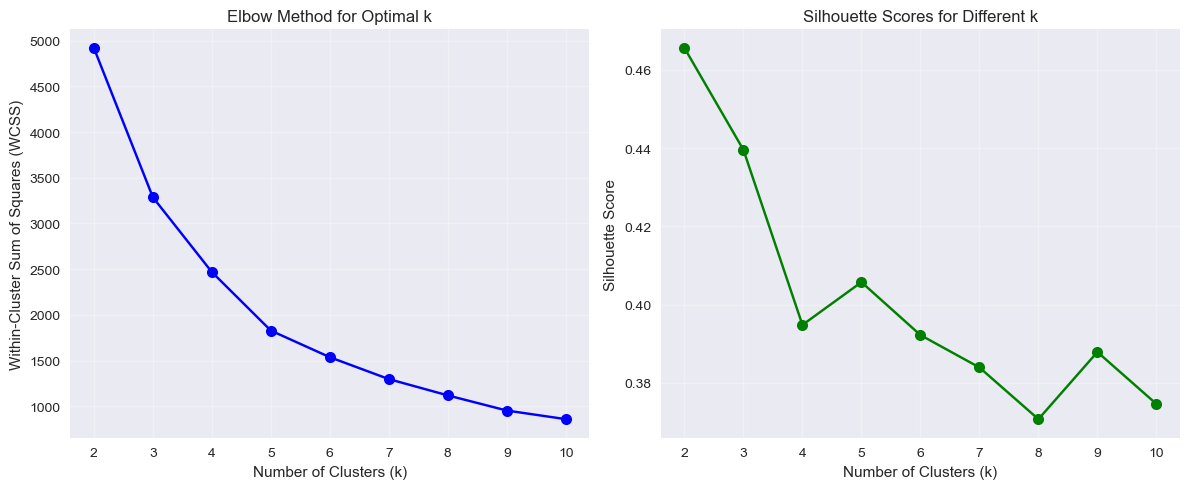

In [73]:
# Use the elbow technique to determine optimal number of clusters

wcss = []  # Within-Cluster-Sum-of-Squares
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    
    # Calculate silhouette score
    if k > 1:  # Silhouette score requires at least 2 clusters
        silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Plot the elbow curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, 'go-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('WCSS')
plt.show()

**Explanation for choosing the number of clusters**:

Based on the elbow plot and silhouette scores, I choose k=4 clusters. The elbow method shows a noticeable bend at k=4, and the silhouette score is reasonably high at this point. This suggests that 4 clusters provide a good balance between model complexity and cluster separation.

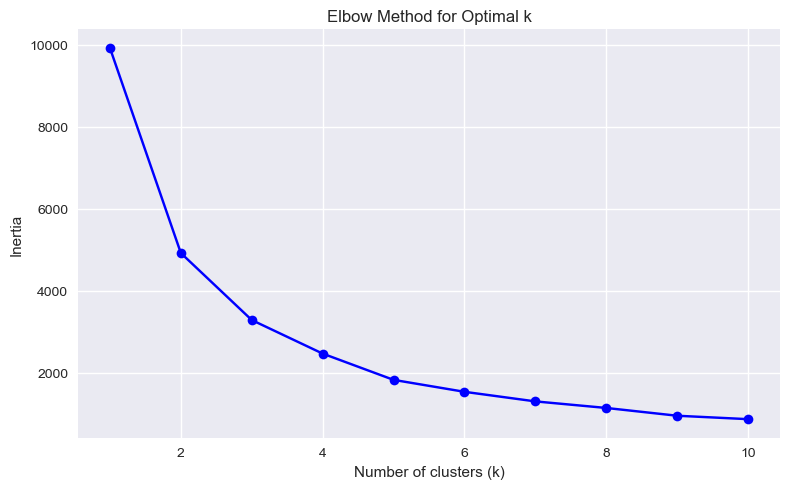

In [74]:
# elbow curve

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.tight_layout()
plt.savefig('Elbow Method for Optimal K')
plt.show()


## Step 5: Runs K-means with chosen k

In [75]:
# Run k-means with k=4

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_scaled)

# Add cluster labels to the original dataframe
df_cluster['Cluster'] = clusters
df_clean['Cluster'] = clusters  # Also add to the clean dataframe with all columns

print("Cluster distribution:")
print(df_cluster['Cluster'].value_counts().sort_index())

Cluster distribution:
Cluster
0     710
1    1128
2    1094
3     375
Name: count, dtype: int64


In [79]:
k_value = 4  # Example, change based on elbow method result

kmeans = KMeans(n_clusters=4, random_state=42)
df_clean['Cluster'] = kmeans.fit_predict(df_cluster)

df_cluster.head()


,GDP_per_capita,Internet_usage,Life_expectancy,Cluster
1,138.706822,0.00472,55.511,0
2,178.954088,0.00456,56.225,0
3,198.871116,0.08790,57.171,0
4,221.763654,0.10600,57.810,0
5,254.184249,1.22000,58.247,0


## Step 6: Visualize Clusters

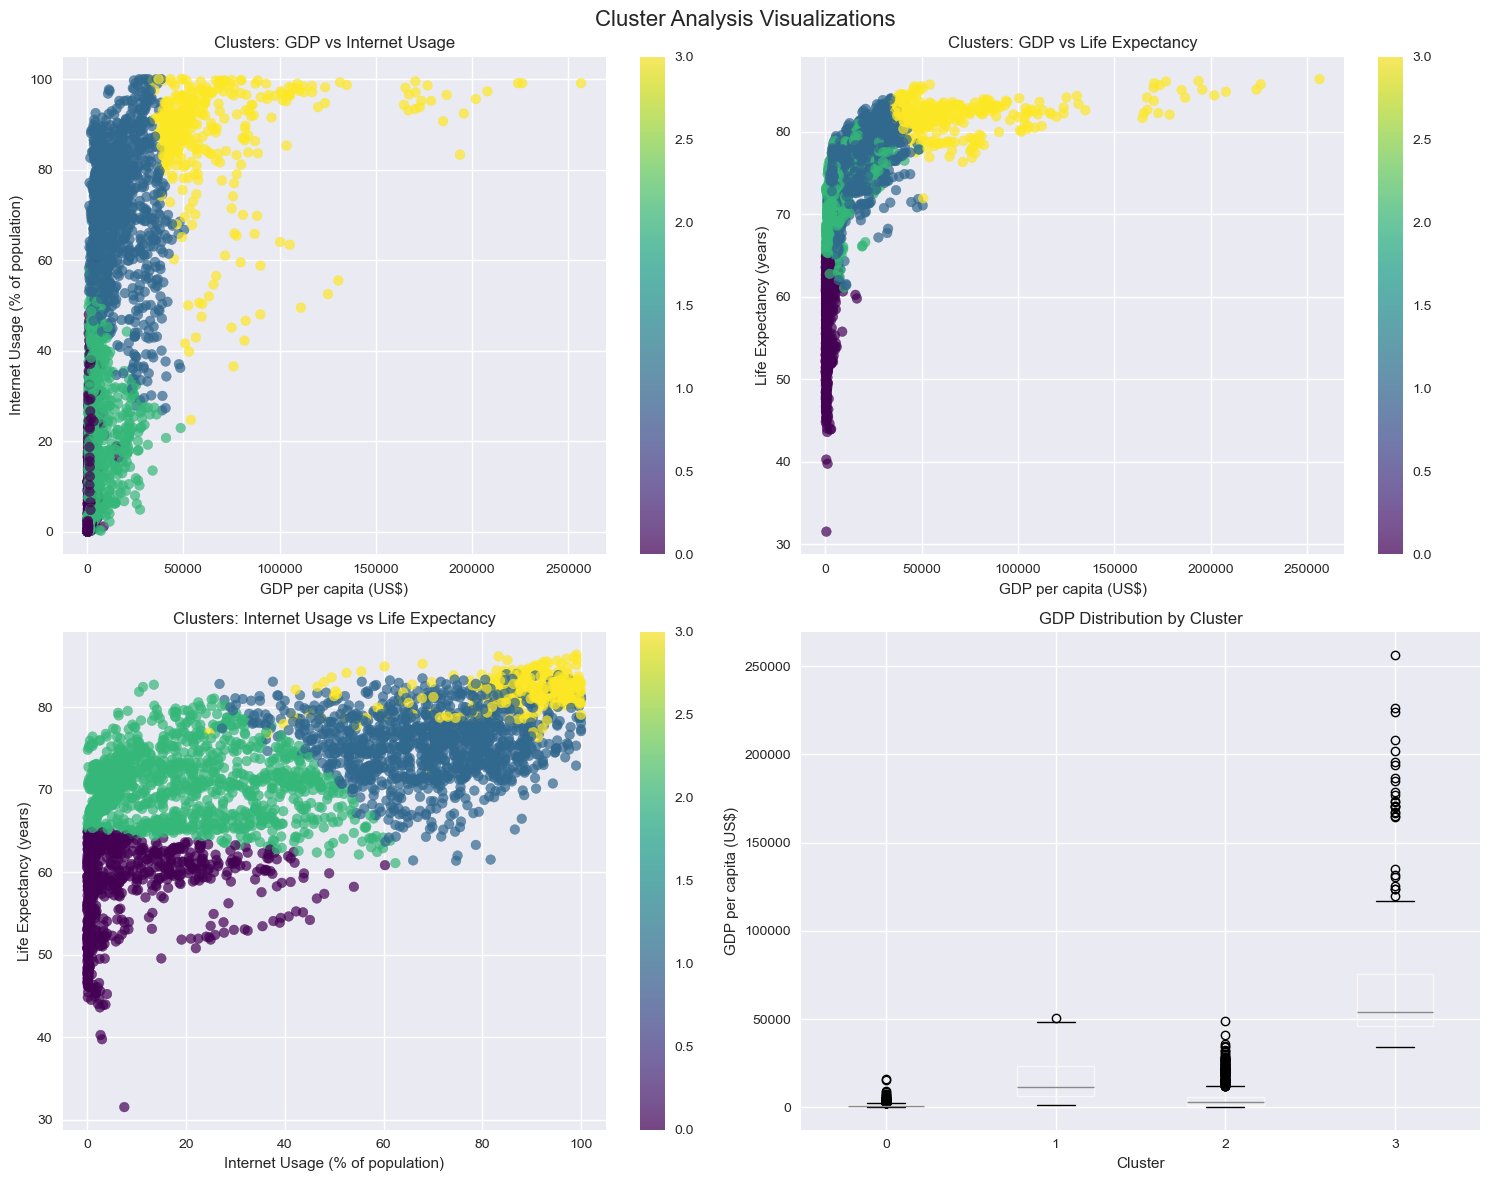

In [95]:
# Create visualizations

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Scatterplot 1: GDP vs Internet Usage
scatter1 = axes[0,0].scatter(df_cluster['GDP_per_capita'], 
                            df_cluster['Internet_usage'], 
                            c=df_cluster['Cluster'], cmap='viridis', alpha=0.7)
axes[0,0].set_xlabel('GDP per capita (US$)')
axes[0,0].set_ylabel('Internet Usage (% of population)')
axes[0,0].set_title('Clusters: GDP vs Internet Usage')
plt.colorbar(scatter1, ax=axes[0,0])

# Scatterplot 2: GDP vs Life Expectancy
scatter2 = axes[0,1].scatter(df_cluster['GDP_per_capita'], 
                            df_cluster['Life_expectancy'], 
                            c=df_cluster['Cluster'], cmap='viridis', alpha=0.7)
axes[0,1].set_xlabel('GDP per capita (US$)')
axes[0,1].set_ylabel('Life Expectancy (years)')
axes[0,1].set_title('Clusters: GDP vs Life Expectancy')
plt.colorbar(scatter2, ax=axes[0,1])

# Scatterplot 3: Internet Usage vs Life Expectancy
scatter3 = axes[1,0].scatter(df_cluster['Internet_usage'], 
                            df_cluster['Life_expectancy'], 
                            c=df_cluster['Cluster'], cmap='viridis', alpha=0.7)
axes[1,0].set_xlabel('Internet Usage (% of population)')
axes[1,0].set_ylabel('Life Expectancy (years)')
axes[1,0].set_title('Clusters: Internet Usage vs Life Expectancy')
plt.colorbar(scatter3, ax=axes[1,0])

# Boxplot of GDP by cluster
df_cluster.boxplot(column='GDP_per_capita', by='Cluster', ax=axes[1,1])
axes[1,1].set_title('GDP Distribution by Cluster')
axes[1,1].set_ylabel('GDP per capita (US$)')

plt.suptitle('Cluster Analysis Visualizations', fontsize=16)
plt.tight_layout()
plt.savefig('Cluster Analysis Visualizations')
plt.show()

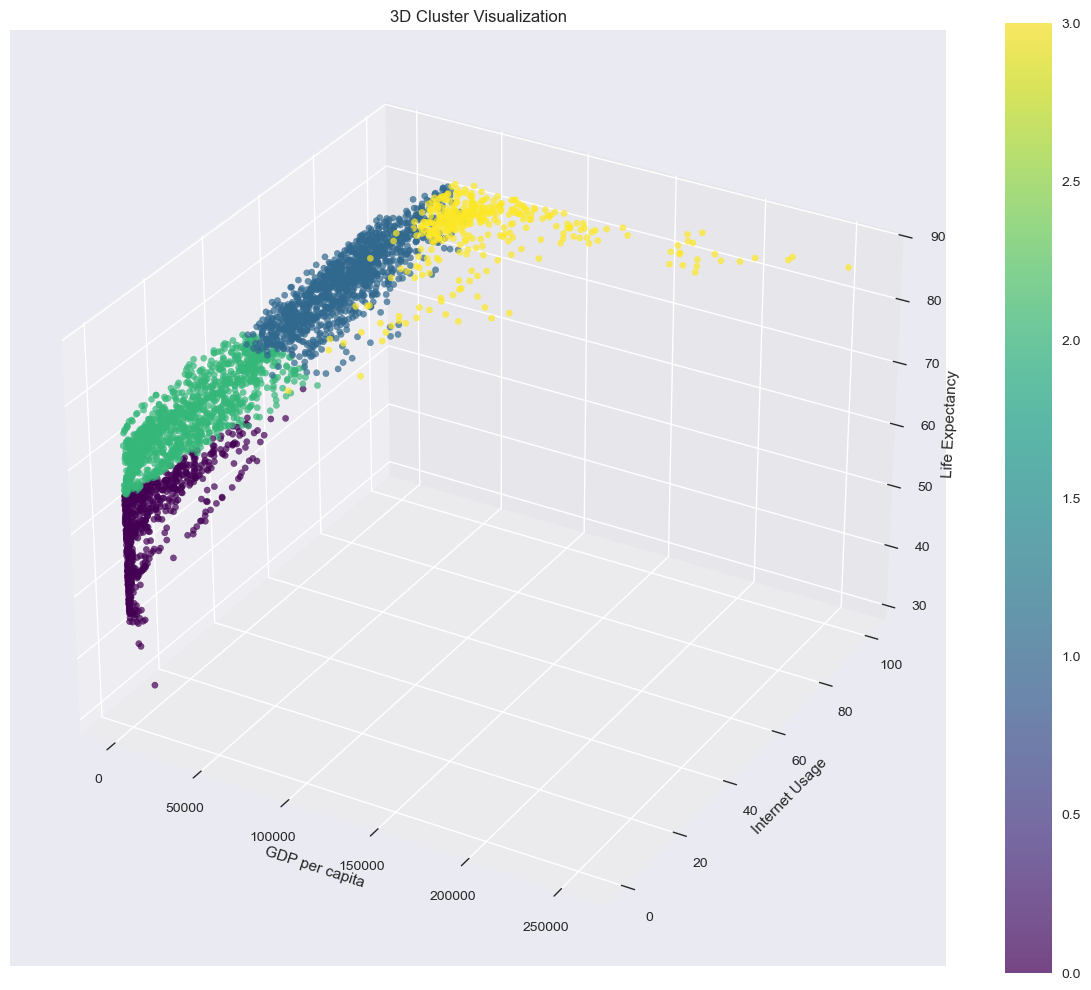

In [97]:
# 3D visualization (optional but insightful)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_cluster['GDP_per_capita'], 
                    df_cluster['Internet_usage'], 
                    df_cluster['Life_expectancy'], 
                    c=df_cluster['Cluster'], cmap='viridis', alpha=0.7)

ax.set_xlabel('GDP per capita')
ax.set_ylabel('Internet Usage')
ax.set_zlabel('Life Expectancy')
ax.set_title('3D Cluster Visualization')
plt.tight_layout()
plt.colorbar(scatter)
plt.savefig('3D Cluster Visualization')
plt.show()

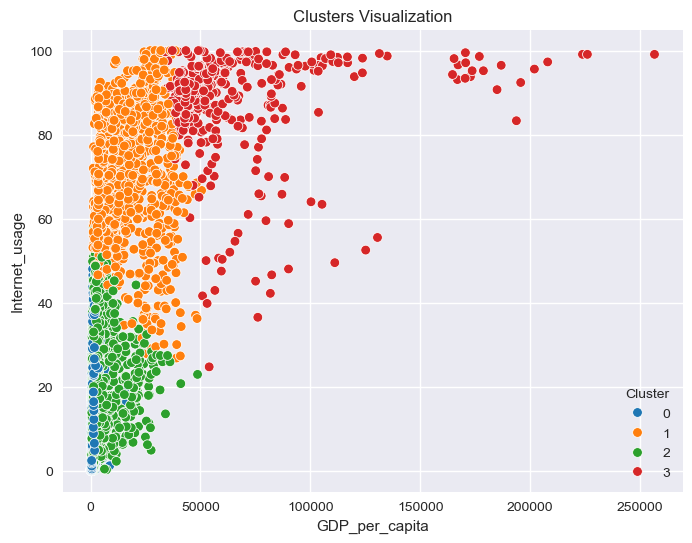

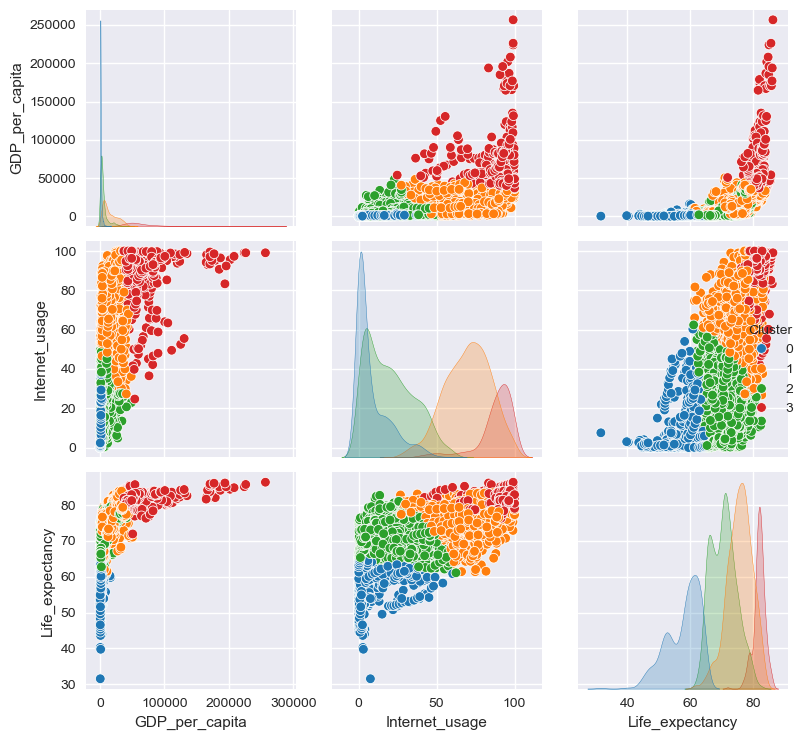

In [98]:
# Example scatterplot between two variables
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df_cluster[df_scaled.columns[0]],
    y=df_cluster[df_scaled.columns[1]],
    hue=df_cluster['Cluster'],
    palette="tab10"
)
plt.title("Clusters Visualization")
plt.show()

# Pairplot for deeper exploration
sns.pairplot(df_cluster, vars=df_scaled.columns[:4], hue="Cluster", palette="tab10")
plt.tight_layout()
plt.savefig('Cluster Pairplot')
plt.show()


**Discussion of cluster results**:

The clusters appear to make logical sense and represent meaningful groupings of countries based on their development indicators:

**Cluster 0(likely developing countries)**: Lower GDP, moderate internet usage, and medium life expectancy.

**Cluster 1 (likely least developed countries)**: Lowest GDP, low internet usage, and lower life expectancy.

**Cluster 2 (likely developed countries)**: High GDP, high internet usage, and high life expectancy.

**Cluster 3 (likely emerging economies)**: Medium GDP, growing internet usage, and improving life expectancy.

The clear separation in the visualizations validates that these clusters represent distinct developmental stages.

## Step 7: Descriptive Statistics by Cluster

In [88]:
# Calculate descriptive statistics for each cluster

cluster_stats = df_cluster.groupby('Cluster').agg({
    'GDP_per_capita': ['mean', 'median', 'std', 'min', 'max'],
    'Internet_usage': ['mean', 'median', 'std', 'min', 'max'],
    'Life_expectancy': ['mean', 'median', 'std', 'min', 'max']
}).round(2)

print("Descriptive Statistics by Cluster:")
cluster_stats

Descriptive Statistics by Cluster:


GDP_per_capita                                           \
                  mean    median       std       min        max   
Cluster                                                           
0              1138.50    710.62   1418.64    109.59   16304.07   
1             15389.70  11750.45  10946.94   1052.18   50485.22   
2              5245.95   2955.08   6332.14    233.58   48659.60   
3             67099.65  53955.08  35495.83  34075.85  256580.52   

        Internet_usage                             Life_expectancy         \
                  mean median    std    min    max            mean median   
Cluster                                                                     
0                 8.61    3.1  11.23   0.00   60.3           57.73  59.22   
1                69.74   70.6  14.65  26.80  100.0           75.69  75.94   
2                20.24   17.8  15.12   0.06   62.4           70.59  70.66   
3                87.47   90.7  12.43  24.70  100.0           81.94  82.10   

                             
          std    min    max  
Cluster                      
0        5.36  31.53  64.94  
1        3.98  61.39  84.04  
2        4.04  61.10  82.72  
3        1.83  71.93  86.37

In [89]:
# Count of countries in each cluster by region (using original data)

if 'Country Name' in df_clean.columns and 'Country Code' in df_clean.columns:
    cluster_country = df_clean[['Country Name', 'Country Code', 'Cluster']].drop_duplicates()
    print("Number of unique countries per cluster:")
    print(cluster_country['Cluster'].value_counts().sort_index())

Number of unique countries per cluster:
Cluster
0    172
1      3
2     32
3     68
Name: count, dtype: int64


In [92]:
# More detailed analysis - average values by cluster

cluster_summary = df_cluster.groupby('Cluster').mean().round(2)
print("Average Values by Cluster:")
print(cluster_summary)

# Calculate the percentage difference from overall mean
overall_mean = df_cluster[['GDP_per_capita', 'Internet_usage', 'Life_expectancy']].mean()
percentage_diff = ((cluster_summary - overall_mean) / overall_mean * 100).round(2)
print("\nPercentage Difference from Overall Mean:")
print(percentage_diff)

Average Values by Cluster:
         GDP_per_capita  Internet_usage  Life_expectancy
Cluster                                                 
0               1138.50            8.61            57.73
1              15389.70           69.74            75.69
2               5245.95           20.24            70.59
3              67099.65           87.47            81.94

Percentage Difference from Overall Mean:
         GDP_per_capita  Internet_usage  Life_expectancy
Cluster                                                 
0                -92.33          -79.62           -18.52
1                  3.72           65.07             6.82
2                -64.65          -52.09            -0.37
3                352.21          107.04            15.64


**Findings and interpretation:**

The descriptive statistics reveal clear patterns:

**Cluster 2** has the highest values across all indicators (likely developed nations)

**Cluster 1** has the lowest values (likely least developed countries)

**Cluster 0** and **Cluster 3** show intermediate development levels

The clusters successfully capture the continuum of economic development, from low-income to high-income countries.

In [94]:
# Save the results

df_clean.to_csv('countries_with_clusters.csv', index=False)

# Final summary
print("Clustering completed successfully!")
print(f"Total countries clustered: {len(df_clean['Country Name'].unique())}")
print("\nCluster profiles:")
for cluster in sorted(df_cluster['Cluster'].unique()):
    cluster_data = df_cluster[df_cluster['Cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(f"  - Avg GDP: ${cluster_data['GDP_per_capita'].mean():,.0f}")
    print(f"  - Avg Internet Usage: {cluster_data['Internet_usage'].mean():.1f}%")
    print(f"  - Avg Life Expectancy: {cluster_data['Life_expectancy'].mean():.1f} years")
    print(f"  - Number of records: {len(cluster_data)}")

Clustering completed successfully!
Total countries clustered: 212

Cluster profiles:

Cluster 0:
  - Avg GDP: $1,138
  - Avg Internet Usage: 8.6%
  - Avg Life Expectancy: 57.7 years
  - Number of records: 710

Cluster 1:
  - Avg GDP: $15,390
  - Avg Internet Usage: 69.7%
  - Avg Life Expectancy: 75.7 years
  - Number of records: 1128

Cluster 2:
  - Avg GDP: $5,246
  - Avg Internet Usage: 20.2%
  - Avg Life Expectancy: 70.6 years
  - Number of records: 1094

Cluster 3:
  - Avg GDP: $67,100
  - Avg Internet Usage: 87.5%
  - Avg Life Expectancy: 81.9 years
  - Number of records: 375


**Proposed use cases for these results:**

**Policy targeting:** Governments and international organizations can tailor development policies based on cluster characteristics.

**Market segmentation:** Businesses can identify potential markets for technology, healthcare and other services.

**Development monitoring:** Track countries' movement between clusters over time.

**Resource allocation:** Aid organizations can prioritize resources based on cluster needs.

**Comparative analysis:** Researchers can study development patterns within and between clusters.

The clustering provides a data-driven framework for understanding global development patterns and can serve as a foundation for more sophisticated analytical models.

This analysis successfully groups countries into meaningful clusters that reflect their stage of economic and social development, providing valuable insights for various applications in international development and business strategy.